In [1]:
pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("athota1/caltech101")

print("Path to dataset files:", path)

100%|██████████| 262M/262M [00:13<00:00, 19.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/athota1/caltech101/versions/1


In [3]:
import os

# Verify the contents of the dataset folder
dataset_dir = os.path.join(path, '101_ObjectCategories')
print(os.listdir(dataset_dir))  # Check if the folder contains class subdirectories


['camera', 'rhino', 'wild_cat', 'windsor_chair', 'sunflower', 'revolver', 'watch', 'dollar_bill', 'garfield', 'schooner', 'stop_sign', 'stapler', 'chandelier', 'pizza', 'okapi', 'joshua_tree', 'brain', 'cup', 'flamingo', 'scorpion', 'metronome', 'Faces_easy', 'menorah', 'kangaroo', 'bonsai', 'brontosaurus', 'airplanes', 'Faces', 'euphonium', 'beaver', 'flamingo_head', 'crocodile', 'stegosaurus', 'strawberry', 'helicopter', 'sea_horse', 'ferry', 'grand_piano', 'octopus', 'Motorbikes', 'dalmatian', 'lobster', 'lotus', 'binocular', 'electric_guitar', 'wrench', 'gerenuk', 'rooster', 'chair', 'buddha', 'ceiling_fan', 'ewer', 'soccer_ball', 'inline_skate', 'pagoda', 'emu', 'car_side', 'headphone', 'mayfly', 'mandolin', 'laptop', 'scissors', 'ketch', 'barrel', 'cougar_face', 'umbrella', 'Leopards', 'platypus', 'water_lilly', 'cellphone', 'crab', 'cougar_body', 'lamp', 'ant', 'dolphin', 'bass', 'nautilus', 'accordion', 'pigeon', 'dragonfly', 'hawksbill', 'llama', 'elephant', 'saxophone', 'hedg

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [34]:
datagen=ImageDataGenerator(rescale=1.0/255.,validation_split=0.25)


In [6]:
tg=datagen.flow_from_directory(dataset_dir,target_size=(64,64),batch_size=2000,class_mode='categorical',subset='training')
vg=datagen.flow_from_directory(dataset_dir,target_size=(64,64),batch_size=2000,class_mode='categorical',subset='validation')

Found 6903 images belonging to 102 classes.
Found 2241 images belonging to 102 classes.


In [36]:
help(VGG16)

Help on function VGG16 in module keras.src.applications.vgg16:

VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', name='vgg16')
    Instantiates the VGG16 model.
    
    Reference:
    - [Very Deep Convolutional Networks for Large-Scale Image Recognition](
    https://arxiv.org/abs/1409.1556) (ICLR 2015)
    
    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).
    
    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).
    
    The default input size for this model is 224x224.
    
    Note: each Keras Application expects a specific kind of input preprocessing.
    For VGG16, call `keras.applications.vgg16.preprocess_input` on your
    inputs before passing them to the model

In [7]:
x_train,y_train=tg[0]
x_test,y_test=vg[0]

In [8]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
for layer in base_model.layers:
    layer.trainable=False

In [10]:
print(tg.class_indices)

{'BACKGROUND_Google': 0, 'Faces': 1, 'Faces_easy': 2, 'Leopards': 3, 'Motorbikes': 4, 'accordion': 5, 'airplanes': 6, 'anchor': 7, 'ant': 8, 'barrel': 9, 'bass': 10, 'beaver': 11, 'binocular': 12, 'bonsai': 13, 'brain': 14, 'brontosaurus': 15, 'buddha': 16, 'butterfly': 17, 'camera': 18, 'cannon': 19, 'car_side': 20, 'ceiling_fan': 21, 'cellphone': 22, 'chair': 23, 'chandelier': 24, 'cougar_body': 25, 'cougar_face': 26, 'crab': 27, 'crayfish': 28, 'crocodile': 29, 'crocodile_head': 30, 'cup': 31, 'dalmatian': 32, 'dollar_bill': 33, 'dolphin': 34, 'dragonfly': 35, 'electric_guitar': 36, 'elephant': 37, 'emu': 38, 'euphonium': 39, 'ewer': 40, 'ferry': 41, 'flamingo': 42, 'flamingo_head': 43, 'garfield': 44, 'gerenuk': 45, 'gramophone': 46, 'grand_piano': 47, 'hawksbill': 48, 'headphone': 49, 'hedgehog': 50, 'helicopter': 51, 'ibis': 52, 'inline_skate': 53, 'joshua_tree': 54, 'kangaroo': 55, 'ketch': 56, 'lamp': 57, 'laptop': 58, 'llama': 59, 'lobster': 60, 'lotus': 61, 'mandolin': 62, 'm

In [11]:
x=Flatten()(base_model.output)
x=Dense(64,activation='relu')(x)
x=Dense(90,activation='relu')(x)
preds=Dense(102,activation='softmax')(x)

In [12]:
model=Model(inputs=base_model.input,outputs=preds)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.4649 - loss: 2.2429 - val_accuracy: 0.4745 - val_loss: 2.1997
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5658 - loss: 1.7373 - val_accuracy: 0.5515 - val_loss: 1.8530
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6937 - loss: 1.1414 - val_accuracy: 0.5735 - val_loss: 1.8469
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7209 - loss: 1.0019 - val_accuracy: 0.5835 - val_loss: 1.8648
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7859 - loss: 0.7888 - val_accuracy: 0.5975 - val_loss: 1.8864
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8412 - loss: 0.5458 - val_accuracy: 0.5765 - val_loss: 2.1000
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8553 - loss: 0.4867 - val_accuracy: 0.6155 - val_loss: 2.0742
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8753 - loss: 0.4445 - val_accuracy: 0.5600 - v

In [23]:
for layer in base_model.layers[-4:]:
    layer.trainable=True

In [24]:
x=Flatten()(base_model.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.1)(x)
predictions=Dense(102,activation='softmax')(x)


In [25]:
model = Model(inputs=base_model.input, outputs=predictions)

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
hn=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.3988 - loss: 3.3161 - val_accuracy: 0.5410 - val_loss: 2.2459
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8149 - loss: 0.6825 - val_accuracy: 0.5830 - val_loss: 2.1768
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9094 - loss: 0.3347 - val_accuracy: 0.6050 - val_loss: 2.2700
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9505 - loss: 0.1819 - val_accuracy: 0.6020 - val_loss: 2.2960
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9347 - loss: 0.2338 - val_accuracy: 0.6360 - val_loss: 2.3670
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9542 - loss: 0.1933 - val_accuracy: 0.6075 - val_loss: 2.7513
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9398 - loss: 0.3906 - val_accuracy: 0.6005 - val_loss: 2.6497
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9602 - loss: 0.1791 - val_accuracy: 0.6415 - v

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
predicted: starfish
actual: starfish


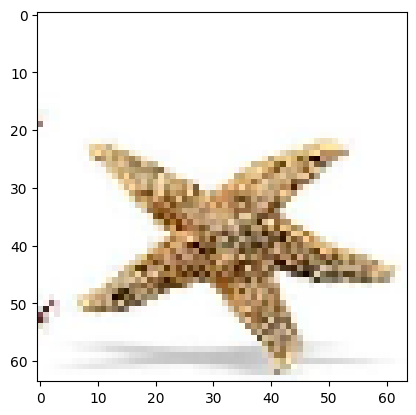

In [37]:
pred_value=model.predict(x_test)
labels=list(vg.class_indices.keys())
n=299
plt.imshow(x_test[n])
print("predicted:",labels[np.argmax(pred_value[n])])
print("actual:",labels[np.argmax(y_test[n])])